# Preprocessing


In [251]:
import warnings
warnings.filterwarnings('ignore')

In [252]:
import pydot_ng as pydot
pydot.InvocationException(1)

pydot_ng.InvocationException(1)

In [253]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.losses import BinaryCrossentropy
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot  as plt
import keras_tuner as kt


In [254]:
Stock = pd.read_csv('Dataset/5681.KL.csv')
Stock.head()
display(Stock)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-08-19,27.900000,28.500000,27.799999,27.980000,21.376362,318900.0
1,2013-08-20,27.980000,28.000000,27.500000,27.980000,21.376362,1000500.0
2,2013-08-21,27.660000,27.780001,27.639999,27.700001,21.162443,872200.0
3,2013-08-22,27.520000,27.520000,26.980000,27.180000,20.765171,1995000.0
4,2013-08-23,27.400000,28.340000,27.139999,27.260000,20.826292,961400.0
...,...,...,...,...,...,...,...
2462,2023-08-14,22.639999,22.879999,22.580000,22.879999,22.879999,378500.0
2463,2023-08-15,22.980000,22.980000,22.660000,22.700001,22.700001,83700.0
2464,2023-08-16,22.700001,22.700001,22.500000,22.700001,22.700001,339100.0
2465,2023-08-17,22.780001,22.799999,22.639999,22.719999,22.719999,764800.0


In [255]:
# Calculation of historical moving averages of closing price (10 and 30 days of trading)
def MA(df, period):
    MA = pd.Series(df['Close'].rolling(period, min_periods=period).mean(), name='MA_' + str(period))
    return MA

Stock['MA10'] = MA(Stock, 10)
Stock['MA30'] = MA(Stock, 30)

#calculation of exponential moving average of closing price (10 and 30 days of trading)
def EMA(df, period):
    EMA = pd.Series(df['Close'].ewm(span=period, min_periods=period).mean(), name='EMA_' + str(period))
    return EMA

Stock['EMA10'] = EMA(Stock, 10)
Stock['EMA30'] = EMA(Stock, 30)


#Calculation of closing price momentum (10 and 30 days of trading)
def MOM(df, period):   
    MOM = pd.Series(df.diff(period), name='Momentum_' + str(period))   
    return MOM

Stock['MOM10'] = MOM(Stock['Close'], 10)
Stock['MOM30'] = MOM(Stock['Close'], 30)

In [256]:
Stock.head(40)

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA30,EMA10,EMA30,MOM10,MOM30
0,2013-08-19,27.900000,28.500000,27.799999,27.980000,21.376362,318900.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-08-20,27.980000,28.000000,27.500000,27.980000,21.376362,1000500.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-08-21,27.660000,27.780001,27.639999,27.700001,21.162443,872200.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-08-22,27.520000,27.520000,26.980000,27.180000,20.765171,1995000.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-08-23,27.400000,28.340000,27.139999,27.260000,20.826292,961400.0,NaN,NaN,NaN,NaN,NaN,NaN
5,2013-08-26,27.260000,27.480000,27.000000,27.139999,20.734619,276500.0,NaN,NaN,NaN,NaN,NaN,NaN
6,2013-08-27,26.719999,26.900000,26.379999,26.600000,20.322060,1297800.0,NaN,NaN,NaN,NaN,NaN,NaN
7,2013-08-28,26.520000,26.520000,25.500000,26.040001,19.894232,1600700.0,NaN,NaN,NaN,NaN,NaN,NaN
8,2013-08-29,25.520000,26.680000,25.520000,26.360001,20.138710,99900.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2013-08-30,26.500000,27.799999,26.420000,27.799999,21.238844,547900.0,27.204,NaN,27.032837,NaN,NaN,NaN


In [257]:
# Creating two columns SMA and LMA to label our dataset
# SMA (Short Moving Average)- The average of the closing price from the next five days in the future
# LMA (Long Moving Average)- The average of the closing price from the last ten days and the next five days in the future

full_data = Stock
full_data['SMA'] = ""
full_data['LMA'] = ""

for ind in range(0, (full_data.shape[0]-5)):
    sma_frame = full_data['Close'].iloc[ind+1:ind+6]
    full_data['SMA'].iloc[ind] = sma_frame.mean()
  
    lma_frame_one = full_data['Close'].iloc[ind-10:ind]
    lma_frame_two = full_data['Close'].iloc[ind+1:ind+6]

    if (lma_frame_one.sum() == 0):
        full_data['LMA'].iloc[ind] = np.NaN
    else: 
        full_data['LMA'].iloc[ind] = (lma_frame_one.sum() + lma_frame_two.sum())/15

full_data['SMA'] = full_data['SMA'].replace('', np.NaN)
full_data['LMA'] = full_data['LMA'].replace('', np.NaN)

#Dropping any empty fields of data
full_data = full_data.dropna(axis=0)
print(full_data.head())

          Date       Open       High    Low      Close  Adj Close    Volume  \
30  2013-10-01  29.100000  29.100000  28.60  29.000000  22.299419  267300.0   
31  2013-10-02  29.200001  29.200001  28.34  29.000000  22.299419  178600.0   
32  2013-10-03  29.200001  29.200001  29.00  29.100000  22.376314   30200.0   
33  2013-10-04  28.660000  29.240000  28.66  29.200001  22.453211  165500.0   
34  2013-10-07  29.299999  29.299999  29.08  29.280001  22.514725   19800.0   

      MA10       MA30      EMA10      EMA30     MOM10     MOM30     SMA  \
30  28.766  27.866667  28.733330  28.255235  0.860001  1.020000  29.196   
31  28.864  27.900667  28.781894  28.309734  0.980000  1.020000  29.208   
32  28.924  27.947333  28.839809  28.367066  0.600000  1.399999  29.248   
33  28.974  28.014667  28.905370  28.427013  0.500000  2.020001  29.288   
34  29.002  28.082000  28.973545  28.487948  0.280001  2.020001  29.272   

          LMA  
30  28.852000  
31  28.913333  
32  28.992000  
33  29.045

In [258]:
#Creating target class - Signal
# The signal on a given trading day represents either 1-Buy or 0-Sell 
# The signal is calculated by comparing the future SMA and intermediate LMA
labelled_data = full_data
labelled_data['signal'] = np.where(labelled_data['SMA'] > labelled_data['LMA'], 1.0, 0.0)

#Dropping the SMA and LMA columns to avoid data leakage
labelled_data  = labelled_data.drop(columns = ['SMA', 'LMA'])
print(labelled_data.head(30))

          Date       Open       High        Low      Close  Adj Close  \
30  2013-10-01  29.100000  29.100000  28.600000  29.000000  22.299419   
31  2013-10-02  29.200001  29.200001  28.340000  29.000000  22.299419   
32  2013-10-03  29.200001  29.200001  29.000000  29.100000  22.376314   
33  2013-10-04  28.660000  29.240000  28.660000  29.200001  22.453211   
34  2013-10-07  29.299999  29.299999  29.080000  29.280001  22.514725   
35  2013-10-08  29.280001  29.500000  29.040001  29.400000  22.606991   
36  2013-10-09  29.400000  29.420000  29.040001  29.059999  22.345551   
37  2013-10-10  29.000000  29.420000  29.000000  29.299999  22.530104   
38  2013-10-11  29.540001  29.920000  29.400000  29.400000  22.606991   
39  2013-10-14  29.020000  29.680000  29.020000  29.200001  22.453211   
40  2013-10-16  29.799999  29.900000  29.540001  29.639999  22.791540   
41  2013-10-17  29.700001  29.959999  29.620001  29.760000  22.883816   
42  2013-10-18  29.980000  30.000000  29.719999  29

In [259]:
# Creating the MinMaxScaler Object
scaler = MinMaxScaler()

temp = labelled_data.drop(['Date', 'signal'], axis=1)
cols = temp.columns

#Creating scaled data
temp = scaler.fit_transform(temp)

#Generating input_df which will be used for model training and predictions
input_df = pd.concat([labelled_data['Date'],pd.DataFrame(temp, columns = cols),
                      labelled_data['signal']], 
                      axis=1, ignore_index=False)

input_df = input_df.dropna(axis=0)
print(input_df.head())
print(input_df.tail())

          Date      Open      High       Low     Close  Adj Close    Volume  \
30  2013-10-01  0.905993  0.844693  0.916567  0.899884   0.859174  0.085538   
31  2013-10-02  0.898942  0.846927  0.914184  0.899884   0.859174  0.014708   
32  2013-10-03  0.897767  0.854749  0.923719  0.909197   0.868269  0.069127   
33  2013-10-04  0.900118  0.858101  0.927294  0.911525   0.870544  0.106559   
34  2013-10-07  0.900118  0.861453  0.927294  0.911525   0.870544  0.096356   

        MA10      MA30     EMA10     EMA30     MOM10     MOM30  signal  
30  0.969672  0.956065  0.958913  0.955630  0.559223  0.765249     1.0  
31  0.966288  0.958678  0.956099  0.956019  0.586408  0.765249     1.0  
32  0.961278  0.961432  0.955771  0.957138  0.563107  0.770795     1.0  
33  0.959924  0.964045  0.955998  0.958371  0.615534  0.765249     1.0  
34  0.956810  0.966467  0.956183  0.959523  0.590291  0.757856     1.0  
            Date      Open      High       Low     Close  Adj Close    Volume  \
2396  

In [260]:
# Splitting entire data to create Training and Testing Data
# We will need to split the training and testing data into equivalent 
# time steps to train the Model

# Creating Training and Testing indices
train_data_size = int((0.7)*(input_df.shape[0]))
test_data_size = int(input_df.shape[0] - train_data_size)

# Allocating data instances to training and testing sets, excluding the date
train_data = input_df.iloc[0:train_data_size,1:]
test_data = input_df.iloc[train_data_size:input_df.shape[0],1:]


full_training_data = train_data # Used during model prediction
full_test_data = test_data  # Used during model prediction

# Creating numpy arrays from dataframes for future processing
train_data = np.array(train_data)
test_data = np.array(test_data)

print(train_data.shape)
print(test_data.shape)

(1659, 13)
(712, 13)


In [261]:
# Creating X_train and y_train
# As an example, this function looks back at five days of trading:
# X - Consists of all features excluding signal from last 5 days 
# y - Consists of signal from one day ahead

X_train = []
y_train = []

time_step = 5
label_col = (train_data.shape[1]-1)

for i in range(time_step, train_data.shape[0]):
    X_train.append(train_data[i-time_step:i,:label_col])
    y_train.append(train_data[i,label_col])
    
X_train, y_train = np.array(X_train), np.array(y_train)

print('\nShapes of X_train and Y_train:\n')
print(X_train.shape)
print(y_train.shape)

print('\nFirst Element in X_train and Y_train:\n')
print(X_train[0])
print(y_train[0])


Shapes of X_train and Y_train:

(1654, 5, 12)
(1654,)

First Element in X_train and Y_train:

[[0.90599289 0.84469268 0.9165674  0.89988359 0.85917405 0.08553803
  0.96967234 0.95606535 0.95891275 0.95563027 0.5592233  0.76524942]
 [0.89894242 0.84692737 0.91418355 0.89988359 0.85917405 0.01470819
  0.96628756 0.95867768 0.95609852 0.95601879 0.58640767 0.76524942]
 [0.89776733 0.8547486  0.92371865 0.90919674 0.86826906 0.0691272
  0.96127808 0.9614325  0.95577139 0.95713784 0.5631067  0.7707947 ]
 [0.90011757 0.8581005  0.92729446 0.91152497 0.87054353 0.10655909
  0.95992416 0.96404482 0.95599758 0.95837147 0.61553379 0.76524923]
 [0.90011757 0.86145251 0.92729446 0.91152497 0.87054353 0.09635635
  0.95681015 0.96646716 0.95618264 0.95952333 0.59029107 0.75785552]]
1.0


In [262]:
# Creating X_test and y_test
# As an example, this function looks back at five days of trading:
# X - Consists of all features excluding signal from last 5 days 
# y - Consists of signal from one day ahead

X_test = []
y_test = []

# Gathering the last five days of training data as this 
# will be used to predict the first few labels in y_test
last_5_days = full_training_data.tail()
test_data_df = pd.concat([last_5_days, full_test_data], ignore_index=True)

for i in range(time_step, test_data_df.shape[0]):
    X_test.append(test_data_df.iloc[i-time_step:i,:label_col])
    y_test.append(test_data_df.iloc[i, label_col])

X_test, y_test = np.array(X_test), np.array(y_test)
print('\nShapes of X_test and Y_test:\n')
print(X_test.shape)
print(y_test.shape)

print('\nFirst Element in X_test and Y_test:\n')
print(X_test[0])
print(y_test[0])



Shapes of X_test and Y_test:

(712, 5, 12)
(712,)

First Element in X_test and Y_test:

[[0.36545241 0.35083793 0.38259833 0.39115256 0.59475682 0.01882073
  0.32669915 0.32331147 0.3270934  0.30904141 0.73980573 0.56377073]
 [0.38895417 0.36312849 0.40882002 0.40395809 0.60965741 0.01238998
  0.3306255  0.3213641  0.33396506 0.31146507 0.69126204 0.5878003 ]
 [0.39247944 0.37877089 0.41239571 0.40279389 0.60830265 0.02717676
  0.33807202 0.32031916 0.33934039 0.31363922 0.74174748 0.62292034]
 [0.39247944 0.3575419  0.35876043 0.34807922 0.54463734 0.03008435
  0.33671811 0.31704188 0.3321329  0.31129593 0.61553398 0.5360444 ]
 [0.35722673 0.32290497 0.34207384 0.32945279 0.52296354 0.02881391
  0.33387489 0.31656691 0.32228503 0.3076137  0.59417466 0.64510148]]
0.0


In [263]:
from sklearn.model_selection import train_test_split

# Assuming X_train and y_train are your training data
# You can adjust the test_size parameter to control the proportion of the dataset to include in the test split
# For example, setting test_size=0.2 means that 20% of the data will be used for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Now X_train and y_train are used for training, and X_val and y_val are used for validation

# Model Training


In [264]:
# Model definition
def build_model():

    model = Sequential()

    model.add(LSTM(units = 30, activation = 'relu',input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
   
    model.add(Dense(units = 10, activation = 'relu'))
           
    model.add(Dense(units = 1, activation = 'sigmoid'))
   
    print(model.summary())

    return model

# Model Compile
def compile_model(model):

    met = [keras.metrics.BinaryAccuracy(name='accuracy'),keras.metrics.Precision(name='precision'),
                keras.metrics.Recall(name='recall'), keras.metrics.AUC(name='auc')]
    
    model.compile(optimizer='adam', loss = BinaryCrossentropy(), metrics = met)

    return model

# Model Training
def train_model(model, X_train, Y_train):
    
    batch_size = 32
    epochs = 80

    #Capturing the unique counts of 0 and 1 signal classes
    (unique,counts) = np.unique(y_train, return_counts=True)
    frequencies = np.asarray((unique, counts)).T

    neg = frequencies[0][1]
    pos= frequencies[1][1]
    total = neg+pos

    #Calculating weights for teh two binary classes
    weight_for_0 = (1 / neg)*(total)/2.0 
    weight_for_1 = (1 / pos)*(total)/2.0
    
    #Defining parameters for the class weights
    cw = {0: weight_for_0, 1: weight_for_1}
       
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose = 1)

    return model, history

# Model Evaluation and Results Evaluation
def eval_model(m, test_X, test_y):

    y_pred = m.predict(test_X)
    y_pred = y_pred.flatten()
    
    # Round predictions to two decimal places
    y_pred_rounded = np.round(y_pred, decimals=2)
    
    print('PREDICTED SIGNAL: \n')
    print(y_pred_rounded)

    def map_signal(prediction):
        if prediction <= 0.2:
            return 'Strong Sell'
        elif prediction <= 0.4:
            return 'Sell'
        elif prediction <= 0.6:
            return 'Neutral'
        elif prediction <= 0.8:
            return 'Buy'
        else:
            return 'Strong Buy'

# Apply the function to each rounded prediction
    signals = [map_signal(pred) for pred in y_pred_rounded]

# Print the signals
    print('PREDICTED SIGNAL: \n')
    print('Head of the signal array:')
    print(signals[:10])

# Print the tail of the array
    print('\nTail of the signal array:')
    print(signals[-10:])
    
    print('CONFUSION MATRIX: \n')
    unique_label = np.unique([test_y, y_pred.round()])
    cmtx = pd.DataFrame(
    confusion_matrix(test_y, y_pred.round(), labels=unique_label), 
    index=['  true:{:}'.format(x) for x in unique_label], 
    columns=['pred:{:}'.format(x) for x in unique_label])
    print(cmtx)


    print('\nCLASSFICATION REPORT: \n')
    print(classification_report(test_y, y_pred.round()))

    # Visualising the results
    print('\nMODEL PREDICTIONS VS ACTUAL: \n')
    plt.figure(figsize=(14,5))
    plt.plot(test_y, color = 'red', label = 'Actual Buy/Sell Signal ')
    plt.plot(y_pred, color = 'blue', label = 'Predicted Buy/Sell Signal')
    plt.title('5681.KL LSTM Stock Buy/Sell Prediction')
    plt.xlabel('Time')
    plt.ylabel('5681.KL Stock Signal')
    plt.legend(loc='best')
    plt.show()
   
    return None

In [265]:
# Class Imbalance
(unique,counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print('Training Instances with Class 0:  ' + str(frequencies[0][1]))
print('Training Instances with Class 1:  ' + str(frequencies[1][1]))
total = int(frequencies[0][1]) + int(frequencies[1][1])
print('Total Training instances:  '+str(total))

Training Instances with Class 0:  672.0
Training Instances with Class 1:  651.0
Total Training instances:  1323


In [266]:
# Executing model building, compiling and training 
# During model training, we print the 
model = build_model()
model = compile_model(model)
model, history = train_model(model, X_train, y_train)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 30)             │         5,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,481 (21.41 KB)

 Trainable params: 5,481 (21.41 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5010 - auc: 0.5101 - loss: 0.6943 - precision: 0.5142 - recall: 0.7749
Epoch 2/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5095 - auc: 0.5204 - loss: 0.6930 - precision: 0.5176 - recall: 0.2522
Epoch 3/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5593 - auc: 0.5824 - loss: 0.6874 - precision: 0.5530 - recall: 0.4000
Epoch 4/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5601 - auc: 0.5945 - loss: 0.6867 - precision: 0.5354 - recall: 0.8574
Epoch 5/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5526 - auc: 0.5843 - loss: 0.6850 - precision: 0.5727 - recall: 0.3595
Epoch 6/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5372 - auc: 0.5999 - loss: 0.6811 - precision: 0.5494 - recall: 0.4698
Epoch 7/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6149 - auc: 0.6323 - loss: 0.6688 - precision: 0.6731 - recall: 0.3699
Epoch 8/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


MODEL TRAINING RESULTS



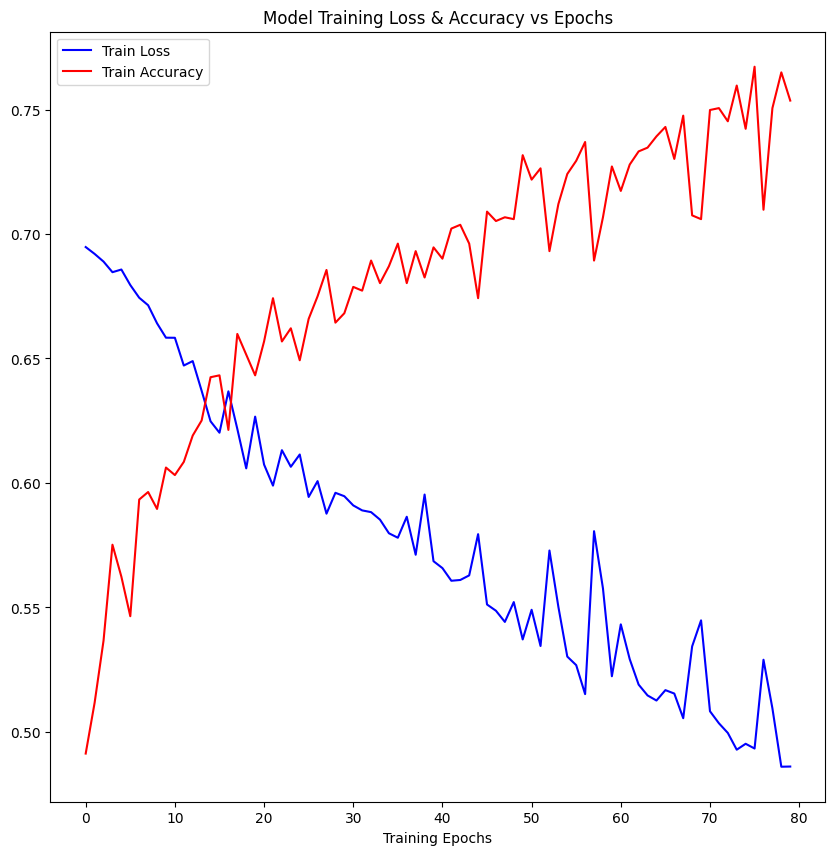

In [267]:
# Plotting Training loss vs Epochs 
def plot_curves(history): 
    
    print('\nMODEL TRAINING RESULTS\n')
    plt.figure(figsize=(10,10))
    plt.plot(history.history['loss'], color = 'blue')
    plt.plot(history.history['accuracy'], color = 'red')
    plt.title('Model Training Loss & Accuracy vs Epochs')
    plt.xlabel('Training Epochs')
    plt.legend(['Train Loss', 'Train Accuracy'], loc='best')
    plt.show()
        
plot_curves(history)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
PREDICTED SIGNAL: 

[0.04 0.05 0.07 0.15 0.73 0.66 0.4  0.19 0.06 0.05 0.07 0.29 0.5  0.48
 0.69 0.77 0.71 0.6  0.31 0.55 0.58 0.43 0.56 0.37 0.42 0.38 0.55 0.62
 0.53 0.38 0.18 0.17 0.26 0.55 0.34 0.09 0.1  0.15 0.55 0.68 0.71 0.73
 0.78 0.7  0.49 0.38 0.28 0.37 0.26 0.65 0.63 0.57 0.49 0.32 0.46 0.57
 0.43 0.39 0.24 0.23 0.23 0.14 0.1  0.19 0.2  0.29 0.41 0.4  0.41 0.25
 0.4  0.27 0.42 0.48 0.31 0.12 0.07 0.03 0.01 0.01 0.01 0.01 0.04 0.02
 0.01 0.01 0.01 0.   0.01 0.07 0.08 0.17 0.21 0.51 0.8  0.86 0.91 0.94
 0.95 0.94 0.94 0.95 0.95 0.95 0.89 0.76 0.78 0.8  0.88 0.87 0.86 0.81
 0.6  0.43 0.07 0.24 0.14 0.09 0.17 0.46 0.35 0.22 0.26 0.55 0.56 0.68
 0.7  0.75 0.76 0.75 0.79 0.86 0.86 0.55 0.46 0.49 0.46 0.31 0.22 0.18
 0.12 0.13 0.12 0.14 0.17 0.1  0.12 0.11 0.13 0.09 0.05 0.05 0.05 0.1
 0.19 0.2  0.15 0.25 0.32 0.21 0.17 0.13 0.2  0.23 0.25 0.31 0.35 0.33
 0.46 0.48 0.59 0.73 0.72 0.74 0.75 0.77 0.73 0.62 0.55 0.68 0.7  0.73
 0.77 0.69 0.61 0.

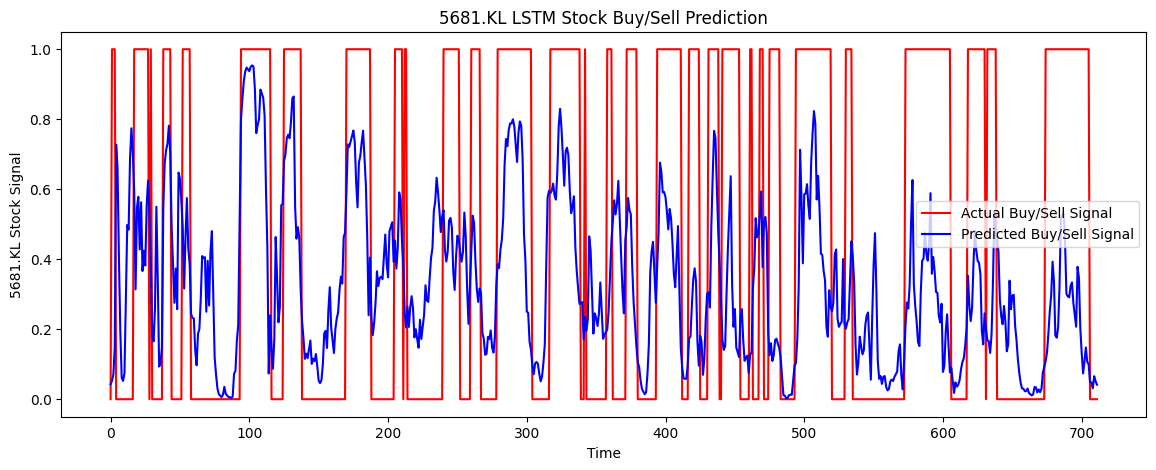

In [268]:
# Testing Initial Model 
# Printing Confusion Matrix, Classification Report, and Visualizing Predicted Signal
tf.keras.utils.plot_model(model, to_file='img/5681.KL-LSTM.png', show_shapes=True)
eval_model(model, X_test, y_test)

In [269]:

def model_builder(hp):

    #Defining Model 
    hyper_model = Sequential()

    hyper_model.add(LSTM(units = hp.Int('input_layer', 10, 90, step=10), activation = 'relu', input_shape = (X_train.shape[1], X_train.shape[2])))
    hyper_model.add(Dropout(hp.Choice('Drop1', values = [0.1,0.2,0.3])))
        
    hyper_model.add(Dense(units = hp.Choice('hidden_1', values = [10,20,30,60,80,100]), activation = 'relu'))
        
    hyper_model.add(Dense(units = 1, activation = 'sigmoid'))
        
    hyper_model.compile(optimizer = Adam(learning_rate=hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])),
                        loss = BinaryCrossentropy(), metrics=['accuracy'])
        
    return hyper_model

In [270]:
# Defining Random Search Tuner and performing hyperparameter tuning
obj = kt.Objective("loss", direction="min")
tuner = kt.tuners.RandomSearch(model_builder, objective=obj, max_trials=25, seed=42, overwrite = True)

tuner.search(X_train, y_train, epochs=78, validation_data=(X_val, y_val))

# Get the optimal hyperparameter values for model layers
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. 

The optimal number of units in the input layer is {best_hps.get('input_layer')}. 
The optimal amount of dropout in the input layer is {best_hps.get('Drop1')}. 
The optimal number of units in the first hidden layer is {best_hps.get('hidden_1')}. 
The optimal learning rate is {best_hps.get('learning_rate')}.
""")


Trial 25 Complete [00h 00m 27s]

Best loss So Far: 0.41689369082450867
Total elapsed time: 00h 12m 10s

The hyperparameter search is complete. 

The optimal number of units in the input layer is 60. 
The optimal amount of dropout in the input layer is 0.1. 
The optimal number of units in the first hidden layer is 20. 
The optimal learning rate is 0.001.



In [271]:
#Step One
model_Two = tuner.hypermodel.build(best_hps)
history = model_Two.fit(X_train, y_train, epochs=100)

acc_per_epoch = history.history['accuracy']
best_epoch = acc_per_epoch.index(max(acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4967 - loss: 0.6938
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5382 - loss: 0.6910
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5365 - loss: 0.6884
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5257 - loss: 0.6915
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5805 - loss: 0.6838
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5591 - loss: 0.6797
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5915 - loss: 0.6636
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5925 - loss: 0.6586
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6301 - loss: 0.6301
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6210 - loss: 0.6321
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6624 - loss: 0.6141
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy:

In [272]:
#Step Two
model_three = tuner.hypermodel.build(best_hps)

# Retrain the final model using the best number of epochs
tuned_history = model_three.fit(X_train, y_train, epochs=best_epoch)

Epoch 1/93
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5069 - loss: 0.6966
Epoch 2/93
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4998 - loss: 0.6941
Epoch 3/93
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5646 - loss: 0.6906
Epoch 4/93
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5387 - loss: 0.6908
Epoch 5/93
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5595 - loss: 0.6879
Epoch 6/93
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5646 - loss: 0.6815
Epoch 7/93
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6000 - loss: 0.6655
Epoch 8/93
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6536 - loss: 0.6305
Epoch 9/93
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6509 - loss: 0.6240
Epoch 10/93
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6211 - loss: 0.6464
Epoch 11/93
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6440 - loss: 0.6254
Epoch 12/93
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6582 - lo


MODEL TRAINING RESULTS



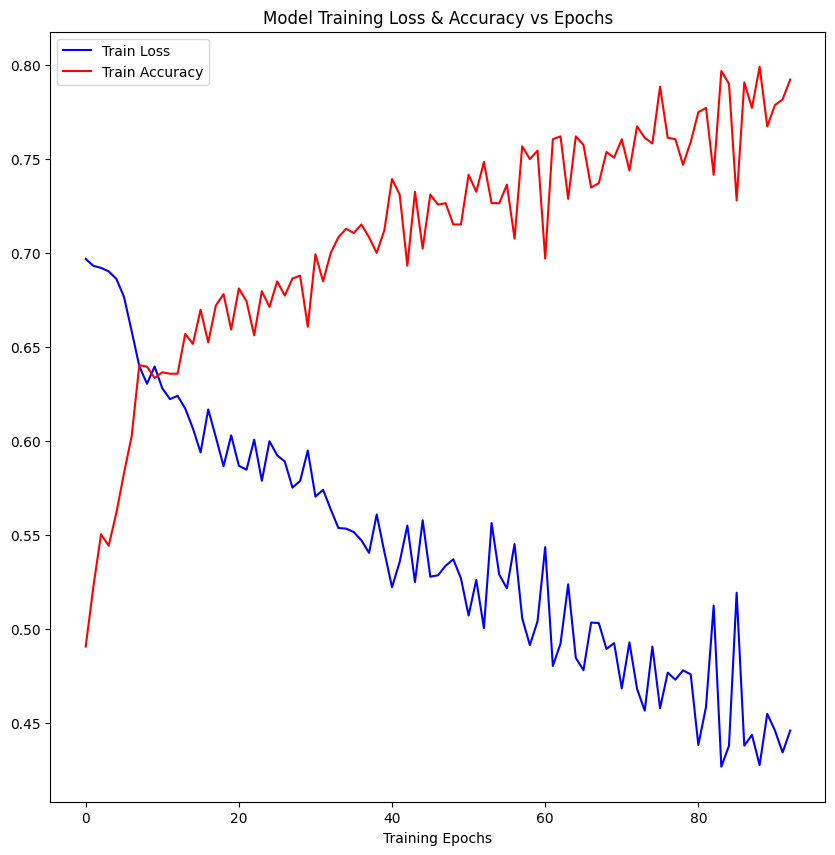

In [273]:
plot_curves(tuned_history)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7449 - loss: 0.5686
[test loss, test accuracy]: [0.5641233921051025, 0.7317415475845337]
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
PREDICTED SIGNAL: 

[0.05 0.05 0.06 0.1  0.94 0.97 0.74 0.27 0.05 0.03 0.04 0.16 0.48 0.58
 0.84 0.88 0.91 0.76 0.56 0.85 0.84 0.59 0.88 0.73 0.55 0.38 0.3  0.39
 0.53 0.48 0.23 0.2  0.44 0.84 0.62 0.1  0.09 0.14 0.63 0.88 0.81 0.8
 0.73 0.72 0.49 0.43 0.21 0.31 0.19 0.65 0.86 0.65 0.41 0.3  0.5  0.76
 0.73 0.61 0.24 0.16 0.14 0.06 0.04 0.11 0.12 0.18 0.26 0.27 0.33 0.19
 0.44 0.27 0.65 0.76 0.78 0.34 0.1  0.04 0.01 0.   0.   0.   0.01 0.
 0.   0.   0.   0.   0.   0.   0.02 0.07 0.05 0.05 0.05 0.18 0.16 0.24
 0.71 0.96 0.95 0.93 0.96 1.   0.99 0.98 0.98 0.99 1.   1.   1.   0.99
 0.97 0.71 0.05 0.28 0.08 0.05 0.1  0.51 0.51 0.17 0.21 0.41 0.38 0.54
 0.58 0.64 0.64 0.68 0.78 0.91 0.91 0.61 0.55 0.57 0.58 0.41 0.29 0.21
 0.11 0.1  0.1  0.12 0.15 0.06 0.08 0.07 0.06 0.04 0.02 0.02 0.03 0.06
 0.17 0.12 0.19 0.18

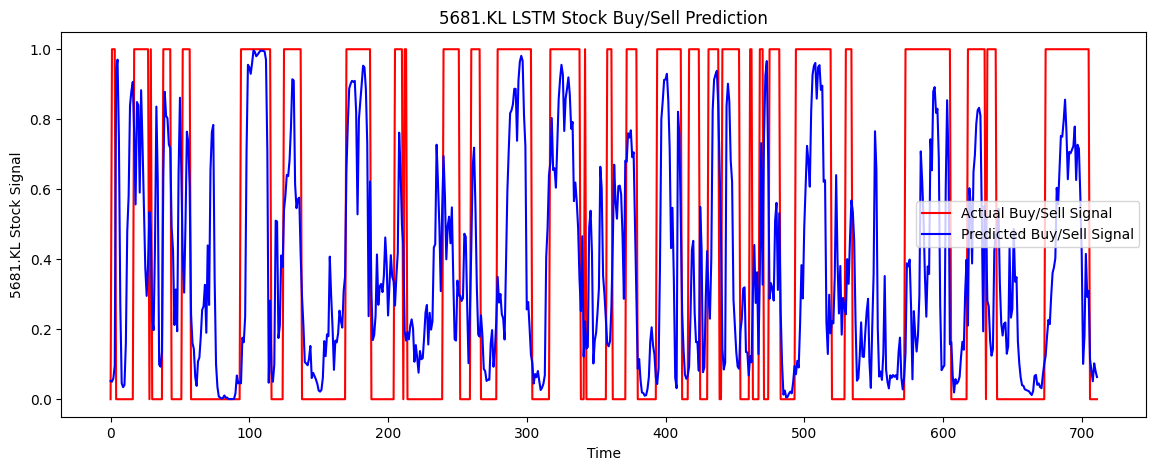

In [274]:
# Tuned Model Evaluation
# Printing Confusion Matrix, Classification Report, and Visualizing the Predicted Signal
eval_result = model_three.evaluate(X_test, y_test)
print("[test loss, test accuracy]:", eval_result)

tf.keras.utils.plot_model(model_three, to_file='img/5681.KL-LSTM-Tuned.png', show_shapes=True)

eval_model(model_three, X_test, y_test)

In [275]:
from sklearn.model_selection import StratifiedKFold

# Define the number of folds for cross-validation
num_folds = 3

# Initialize the StratifiedKFold object
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)

# Lists to store the performance metrics for each fold
val_acc_per_fold = []

# Perform cross-validation
for fold, (train_index, val_index) in enumerate(kfold.split(X_train, y_train), 1):
    print(f"Fold {fold}/{num_folds}:")
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Build the model
    model = build_model()  # Assuming you have defined a function build_model() to create the model
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model on the training data of this fold
    history = model.fit(X_train_fold, y_train_fold, epochs=80, batch_size=32, verbose=0, validation_data=(X_val_fold, y_val_fold))
    
    # Evaluate the model on the validation set of this fold
    _, val_accuracy = model.evaluate(X_val_fold, y_val_fold)
    print(f"Validation Accuracy: {val_accuracy}")
    val_acc_per_fold.append(val_accuracy)

# Print the average validation accuracy across all folds
average_val_accuracy = np.mean(val_acc_per_fold)
print(f"\nAverage Validation Accuracy: {average_val_accuracy}")

Fold 1/3:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 30)             │         5,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,481 (21.41 KB)

 Trainable params: 5,481 (21.41 KB)

 Non-trainable params: 0 (0.00 B)

None
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6745 - loss: 0.5311 
Validation Accuracy: 0.6893423795700073
Fold 2/3:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 30)             │         5,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,481 (21.41 KB)

 Trainable params: 5,481 (21.41 KB)

 Non-trainable params: 0 (0.00 B)

None
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6771 - loss: 0.6243 
Validation Accuracy: 0.6984127163887024
Fold 3/3:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 30)             │         5,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,481 (21.41 KB)

 Trainable params: 5,481 (21.41 KB)

 Non-trainable params: 0 (0.00 B)

None
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7642 - loss: 0.5400 
Validation Accuracy: 0.7233560085296631

Average Validation Accuracy: 0.7037037014961243
